# Problem Description

In the realm of travel and tourism, accurately predicting flight prices is a crucial task with substantial benefits for both travelers and stakeholders in the aviation industry. The ability to forecast flight costs reliably improves travel planning for individuals and holds strategic significance for airlines and related entities. Developing precise regression models for flight price prediction is a key focus, requiring a comprehensive evaluation using diverse performance metrics.

The objective of this study is to examine the flight booking dataset acquired from the "Ease My Trip" website, utilizing various statistical hypothesis tests to extract meaningful insights. The 'K-Nearest Neighbors (KNN),' 'Ordinary Least Squares (OLS),' and 'XGBoost Regression' statistical algorithms will be employed for training the dataset and predicting a continuous target variable. 'Ease My Trip' serves as an online platform for flight ticket bookings, commonly used by potential passengers. A thorough analysis of the data is expected to reveal valuable information that can greatly assist passengers in their travel planning.

The choice of performance metrics in our regression model evaluation was driven by a comprehensive approach to assessing predictive accuracy for flight price prediction. Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) were selected to gauge precision and account for outliers, while R2 Score and Adjusted R2 Score measured the model's ability to explain variance. This diverse set of metrics enables a good understanding of each model's strengths and weaknesses, guiding informed decisions on their suitability for accurate and reliable flight price predictions.

# Dataset description

The dataset, extracted using the Octoparse scraping tool from EaseMyTrip website, encompasses 300,261 flight booking options between India's top 6 metro cities. Data, collected over 50 days from February 11th to March 31st, 2022, is divided into economy and business class tickets. The cleaned dataset comprises 11 features, including departure and destination cities, flight date, airline details, and pricing. Notably, it provides a temporal dimension, aiding analyses of flight booking trends. The geographical focus on major metro cities enhances its relevance. Although subject to potential limitations like website changes, this secondary data source offers valuable insights for studying air travel dynamics. This dataset, with its comprehensive information and cleaned structure, serves as a valuable resource for research and analysis in the aviation domain.

### Columns description

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

# Dependencies loading

In [3]:
!pip install pandas==1.3.4

  Using cached pandas-1.3.4.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.3.4-cp311-cp311-macosx_10_9_x86_64.whl size=10256501 sha256=3450cba837177059b980d5db411c603cedb5fd5967c4a31ed607d7cff050b91d
  Stored in directory: /Users/filipecorreia/Library/Caches/pip/wheels/22/69/2e/6e04478937f6bba79f2a2093dfe1929d19882ad364268f9a2b
Successfully built pandas
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2023.6.0 requires pandas>=1.4, but you have pandas 1.3.4 which is incompatible.


In [1]:
pip install numpy==1.21.2

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.2

In [2]:
!pip uninstall -y pandas

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

pd.set_option("display.max_columns", 500)

# Project setup

In [57]:
raw_input_data_path = "/Users/filipecorreia/Desktop/ML_1/Clean_Dataset.csv"
preprocessed_output_data_path = "/Users/filipecorreia/Desktop/ML_1/Clean_Dataset.csv"

# Dataset Preparation

## Data loading

In [58]:
df=pd.read_csv('/Users/filipecorreia/Desktop/ML_1/Clean_Dataset.csv')
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
162938,162938,GO_FIRST,G8-426,Hyderabad,Night,one,Afternoon,Mumbai,Economy,14.50,32,4165
123350,123350,GO_FIRST,G8-295,Kolkata,Early_Morning,one,Evening,Delhi,Economy,12.00,25,6294
204561,204561,Indigo,6E-193,Chennai,Evening,zero,Night,Hyderabad,Economy,1.25,25,1551
14066,14066,Indigo,6E-967,Delhi,Evening,one,Late_Night,Bangalore,Economy,7.33,22,3671
155061,155061,Indigo,6E-7121,Hyderabad,Early_Morning,one,Evening,Delhi,Economy,9.25,23,6133


## Dataset adjustment

In [59]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [60]:
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [61]:
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))

There are 300153 observations for 11 predictors.


# Initial descriptive analysis of the data

In [62]:
df.shape

(300153, 11)

In [63]:
df.head(15)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## Imputation 

In [64]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Target Variable Analysis 

Measures of central tendency: mean, mode, median, quartiles

In [65]:
selected_mean = df[['duration', 'days_left', 'price']]
selected_mean.mean()

duration        12.221021
days_left       26.004751
price        20889.660523
dtype: float64

In [66]:
selected_median = df[['duration', 'days_left', 'price']]
selected_median.median()

duration       11.25
days_left      26.00
price        7425.00
dtype: float64

In [67]:
selected_mode = df[['duration', 'days_left', 'price']]
selected_mode.mode()

,duration,days_left,price
0,2.17,25,54608


In [68]:
[{i: df.price.quantile(i)} for i in np.arange(0, 1.1, 0.1)]

[{0.0: 1105.0},
 {0.1: 3389.0},
 {0.2: 4394.0},
 {0.30000000000000004: 5232.0},
 {0.4: 6133.0},
 {0.5: 7425.0},
 {0.6000000000000001: 11069.0},
 {0.7000000000000001: 25600.0},
 {0.8: 49725.0},
 {0.9: 57920.0},
 {1.0: 123071.0}]

Measures of dispersion: standard deviation, IQR

In [69]:
selected_var = df[['duration', 'days_left', 'price']]
selected_var.var()

duration     5.172482e+01
days_left    1.839008e+02
price        5.151886e+08
dtype: float64

In [70]:
selected_std = df[['duration', 'days_left', 'price']]
selected_std.std()

duration         7.191997
days_left       13.561004
price        22697.767366
dtype: float64

In [71]:
df.price.quantile(0.75) - df.price.quantile(0.25)

37738.0

Measures of shape: Skewness, Kurtosis

In [72]:
selected_skew = df[['duration', 'days_left', 'price']]
selected_skew.skew()

duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

In [73]:
selected_kurtosis = df[['duration', 'days_left', 'price']]
selected_kurtosis.kurtosis()

duration    -0.268996
days_left   -1.156215
price       -0.396293
dtype: float64

Outcome:
The skewness values for 'duration' and 'price' reveal a right-skewed or positively skewed distribution, implying longer tails on the right and a concentration of data on the left. On the other hand, 'days_Left' exhibits a skewness value close to zero, indicating a nearly symmetric distribution with a balanced spread of data in both directions.

Examining the kurtosis values, all three variables—Duration, Days Left, and Price—display negative kurtosis, suggesting platykurtic shapes. This implies distributions with lighter tails and less peakiness compared to a standard normal distribution. As a result, the likelihood of extreme values or outliers is reduced, and the data tends to be more evenly distributed around the mean.

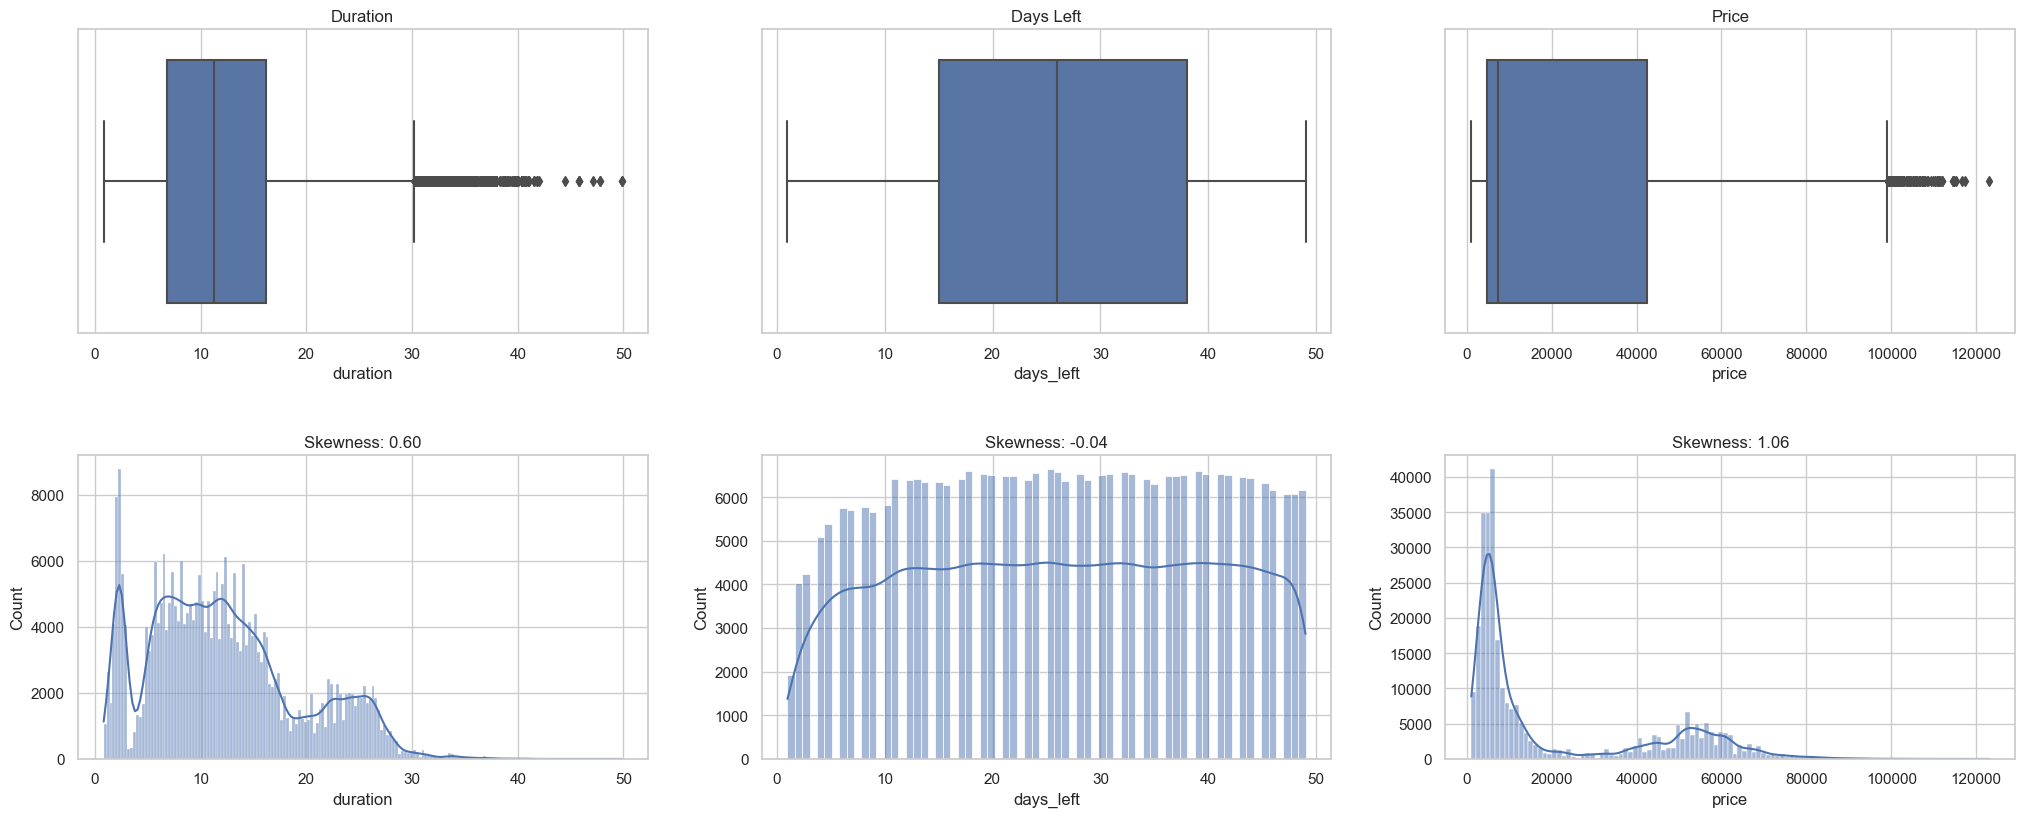

In [74]:
# Create a figure with subplots
plt.figure(figsize=(25, 15))

# Create a grid for subplots
grid = plt.GridSpec(3, 3, hspace=0.4)

# Subplot 1: Box Plot and Skewness Plot for Duration
plt.subplot(grid[0, 0])
sns.boxplot(x=df["duration"], data=df)
plt.title("Duration")

plt.subplot(grid[1, 0])
sns.histplot( df["duration"], kde=True)
plt.title("Skewness: {:.2f}".format( df["duration"].skew()))

# Subplot 2: Box Plot and Skewness Plot for Days Left
plt.subplot(grid[0, 1])
sns.boxplot(x=df["days_left"], data=df)
plt.title("Days Left")

plt.subplot(grid[1, 1])
sns.histplot( df["days_left"], kde=True)
plt.title("Skewness: {:.2f}".format( df["days_left"].skew()))

# Subplot 3: Box Plot and Skewness Plot for Price
plt.subplot(grid[0, 2])
sns.boxplot(x=df["price"], data=df)
plt.title("Price")

plt.subplot(grid[1, 2])
sns.histplot( df["price"], kde=True)
plt.title("Skewness: {:.2f}".format( df["price"].skew()))

plt.show()

Outcome: The presented plot clearly indicates that the target variable 'price' has a positive skewness, mainly attributed to the 'Business' class. Additionally, we are preserving the outlier values in the 'price' variable, as they are predominantly influenced by the 'class' feature, where business class prices significantly surpass economy class prices. The skewness observed in the duration is primarily impacted by the number of stops, encompassing 'zero,' 'one,' and 'two_or_more.'

# Exploratory Data Analysis 

#### Number of Flights by City

In [96]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


#### Number of flights by Airline

In [75]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

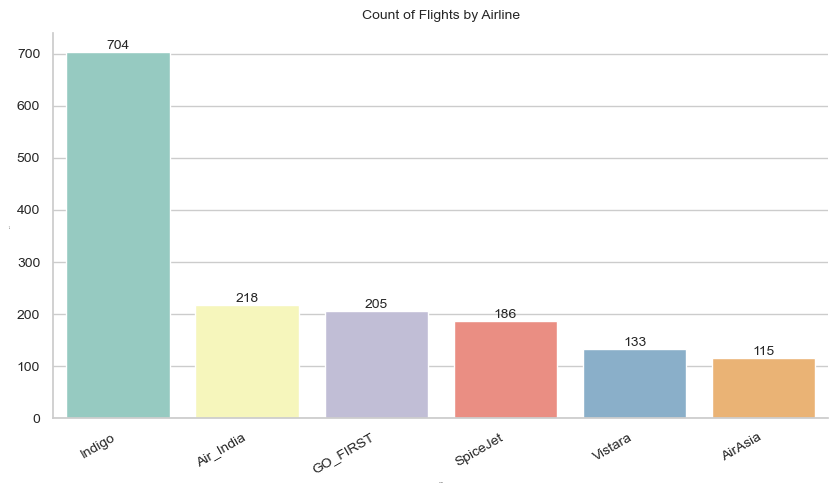

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('Set3', n_colors=len(df1['airline'].unique()))

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

sns.barplot(x=df1['airline'].value_counts().index, y=df1['airline'].value_counts(), palette=colors)

plt.title('Count of Flights by Airline', fontsize=10, pad=10)
plt.xlabel('Airline', fontsize=1)
plt.ylabel('Count', fontsize=1)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

for index, value in enumerate(df1['airline'].value_counts()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

Outcome: Among the airlines, the one with higher flight counts is Indigo, followed by Air India, GO FIRST, AirAsia, Spicejet, and Vistara.

#### Business vs Economy

Economy     1560
Business     295
Name: class, dtype: int64

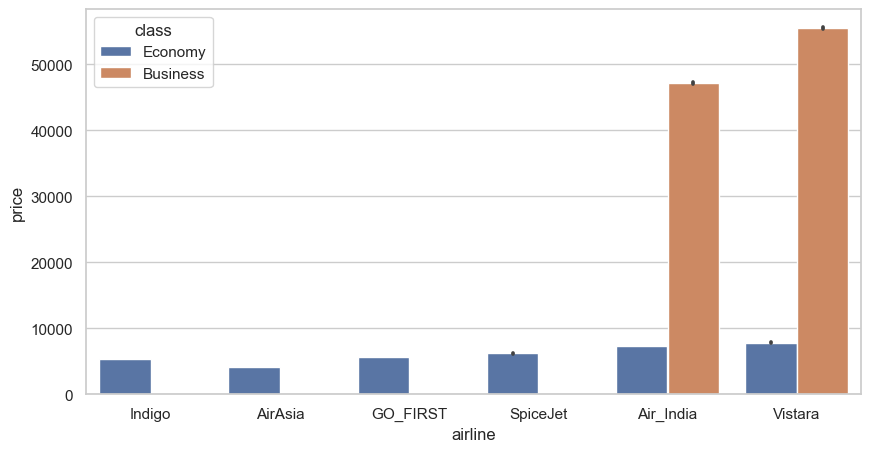

In [115]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('',fontsize=10)

df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Outcome: It is evident that there is a significant difference between the prices of economy and business class.

#### Prices by Airline

T-test for SpiceJet vs AirAsia in Economy Class: p-value = 0.0
T-test for SpiceJet vs Vistara in Economy Class: p-value = 0.0
T-test for SpiceJet vs GO_FIRST in Economy Class: p-value = 3.242574139672204e-57
T-test for SpiceJet vs Indigo in Economy Class: p-value = 1.8370916340242035e-115
T-test for SpiceJet vs Air_India in Economy Class: p-value = 1.9530758792216708e-144
T-test for AirAsia vs Vistara in Economy Class: p-value = 0.0
T-test for AirAsia vs GO_FIRST in Economy Class: p-value = 0.0
T-test for AirAsia vs Indigo in Economy Class: p-value = 0.0
T-test for AirAsia vs Air_India in Economy Class: p-value = 0.0
T-test for Vistara vs GO_FIRST in Economy Class: p-value = 0.0
T-test for Vistara vs Indigo in Economy Class: p-value = 0.0
T-test for Vistara vs Air_India in Economy Class: p-value = 1.0735316572739847e-98
T-test for GO_FIRST vs Indigo in Economy Class: p-value = 2.7085659305970014e-40
T-test for GO_FIRST vs Air_India in Economy Class: p-value = 0.0
T-test for Indigo vs A

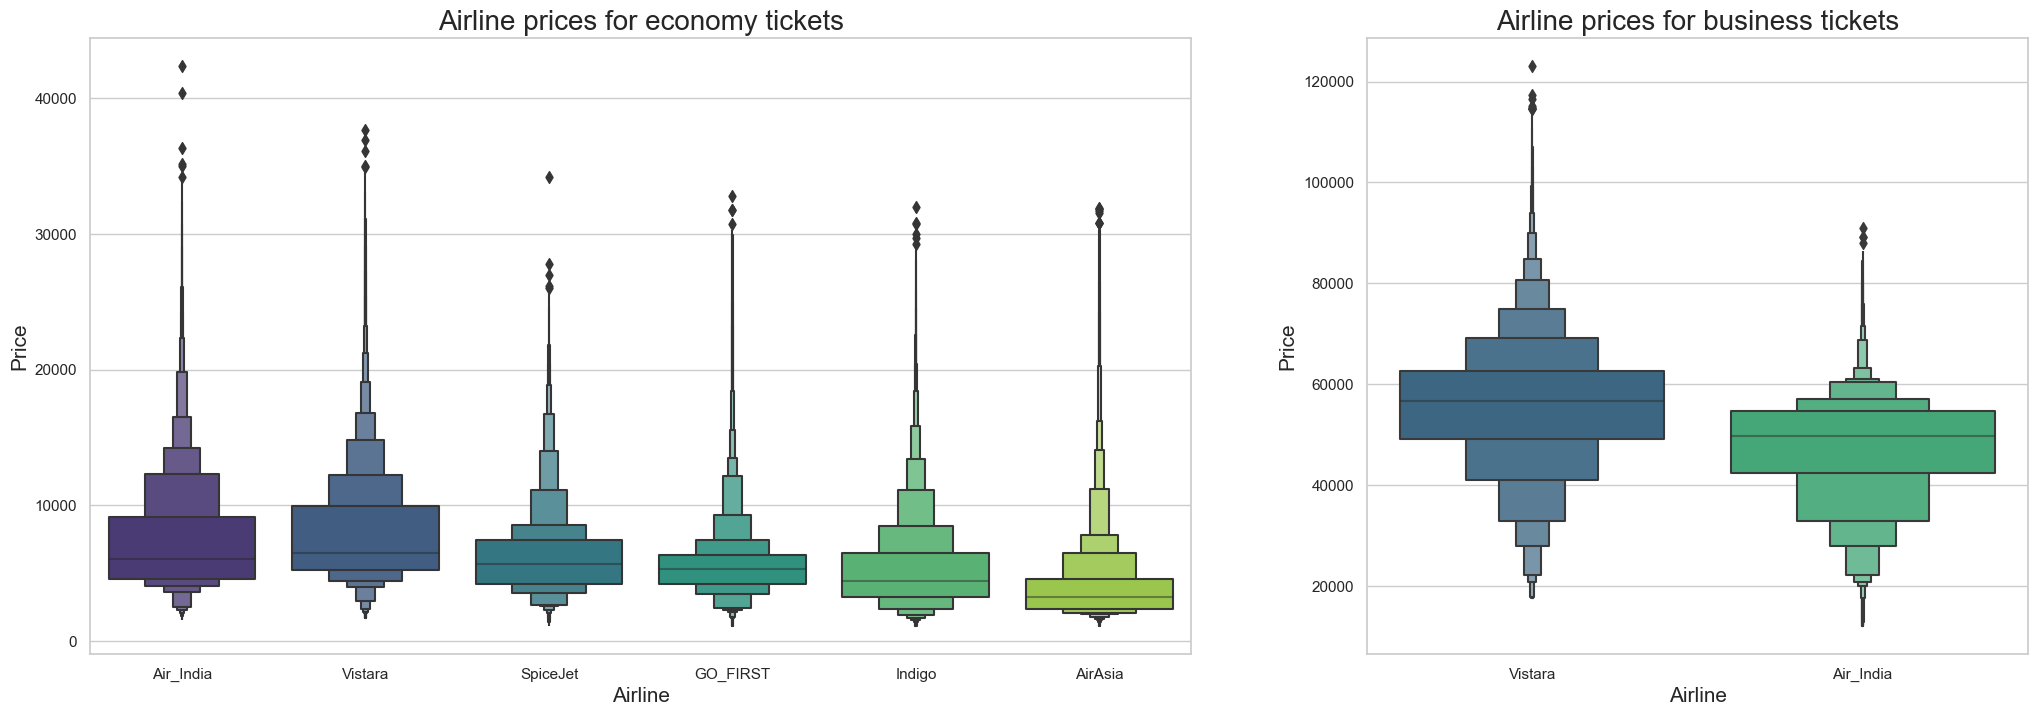

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 8))

economy_data = df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False)
sns.boxenplot(y="price", x="airline", data=economy_data, ax=axs[0], palette='viridis')  # Using boxenplot for a better representation
axs[0].set_title("Airline prices for economy tickets", fontsize=20)
axs[0].set_xlabel('Airline', fontsize=15)
axs[0].set_ylabel('Price', fontsize=15)

business_data = df.loc[df["class"] == 'Business'].sort_values("price", ascending=False)
sns.boxenplot(y="price", x="airline", data=business_data, ax=axs[1], palette='viridis')
axs[1].set_title("Airline prices for business tickets", fontsize=20)
axs[1].set_xlabel('Airline', fontsize=15)
axs[1].set_ylabel('Price', fontsize=15)

airlines_economy = df["airline"].unique()
for i in range(len(airlines_economy)):
    for j in range(i+1, len(airlines_economy)):
        airline1 = airlines_economy[i]
        airline2 = airlines_economy[j]
        t_stat, p_value = ttest_ind(economy_data[economy_data["airline"] == airline1]["price"],
                                    economy_data[economy_data["airline"] == airline2]["price"])
        print(f'T-test for {airline1} vs {airline2} in Economy Class: p-value = {p_value}')

airlines_business = df["airline"].unique()
for i in range(len(airlines_business)):
    for j in range(i+1, len(airlines_business)):
        airline1 = airlines_business[i]
        airline2 = airlines_business[j]
        t_stat, p_value = ttest_ind(business_data[business_data["airline"] == airline1]["price"],
                                    business_data[business_data["airline"] == airline2]["price"])
        print(f'T-test for {airline1} vs {airline2} in Business Class: p-value = {p_value}')

plt.show()


Outcome: Among the airlines, Air India and Vistara have the priciest flight tickets, while AirAsia offers the most budget-friendly fares. Specifically, concerning business class, Vistara's prices are the highest when compared to AirAsia.

#### Price Depending on Days Left for Departure

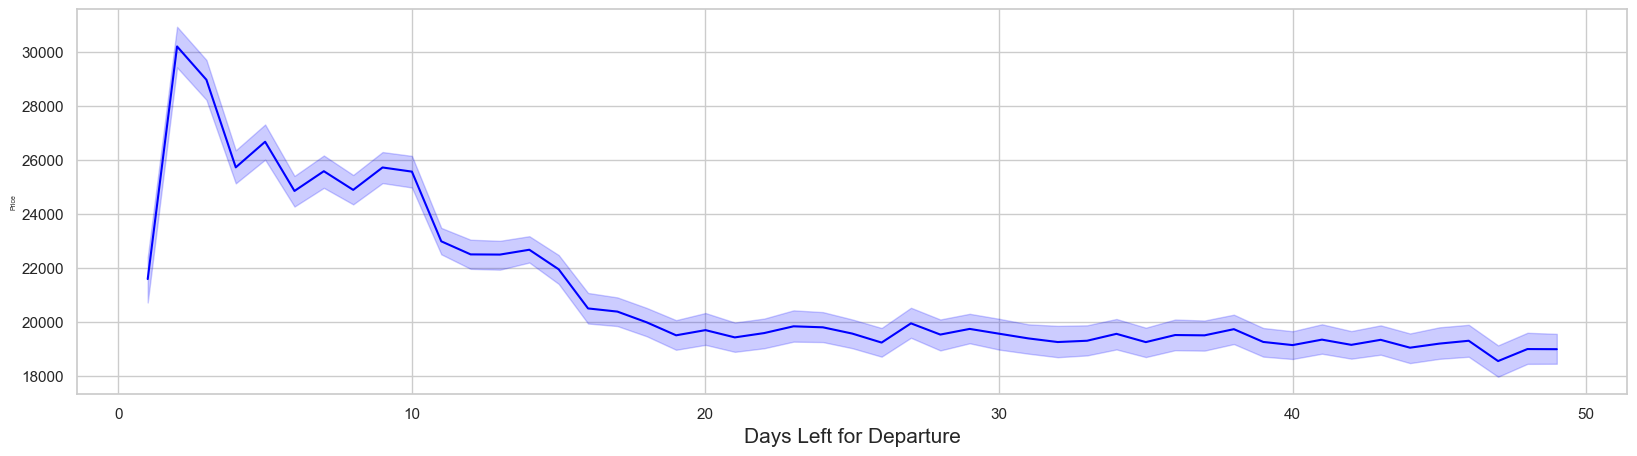

In [93]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('',fontsize=5)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=5)
plt.show()

#### Prices by Airline Depending on Days Left for Departure

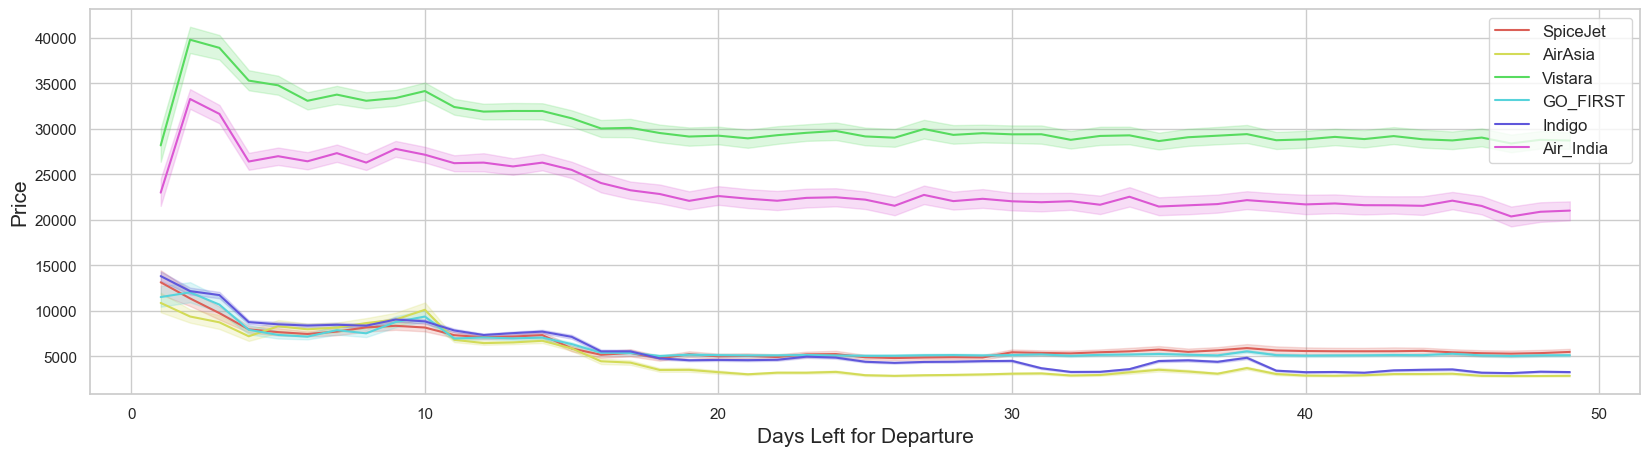

In [95]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Outcome: The charts depict a steady rise in prices leading up to 20 days before the flight, succeeded by a substantial decrease just a day before, leading to prices that are up to three times more affordable. This trend indicates that airlines might lower ticket prices close to the departure date to fill vacant seats and guarantee optimal occupancy on their flights.

Outcome: The most popular cities for visitors are Delhi, Mumbai and Kolkata.

#### Airline prices based on the source and destination cities

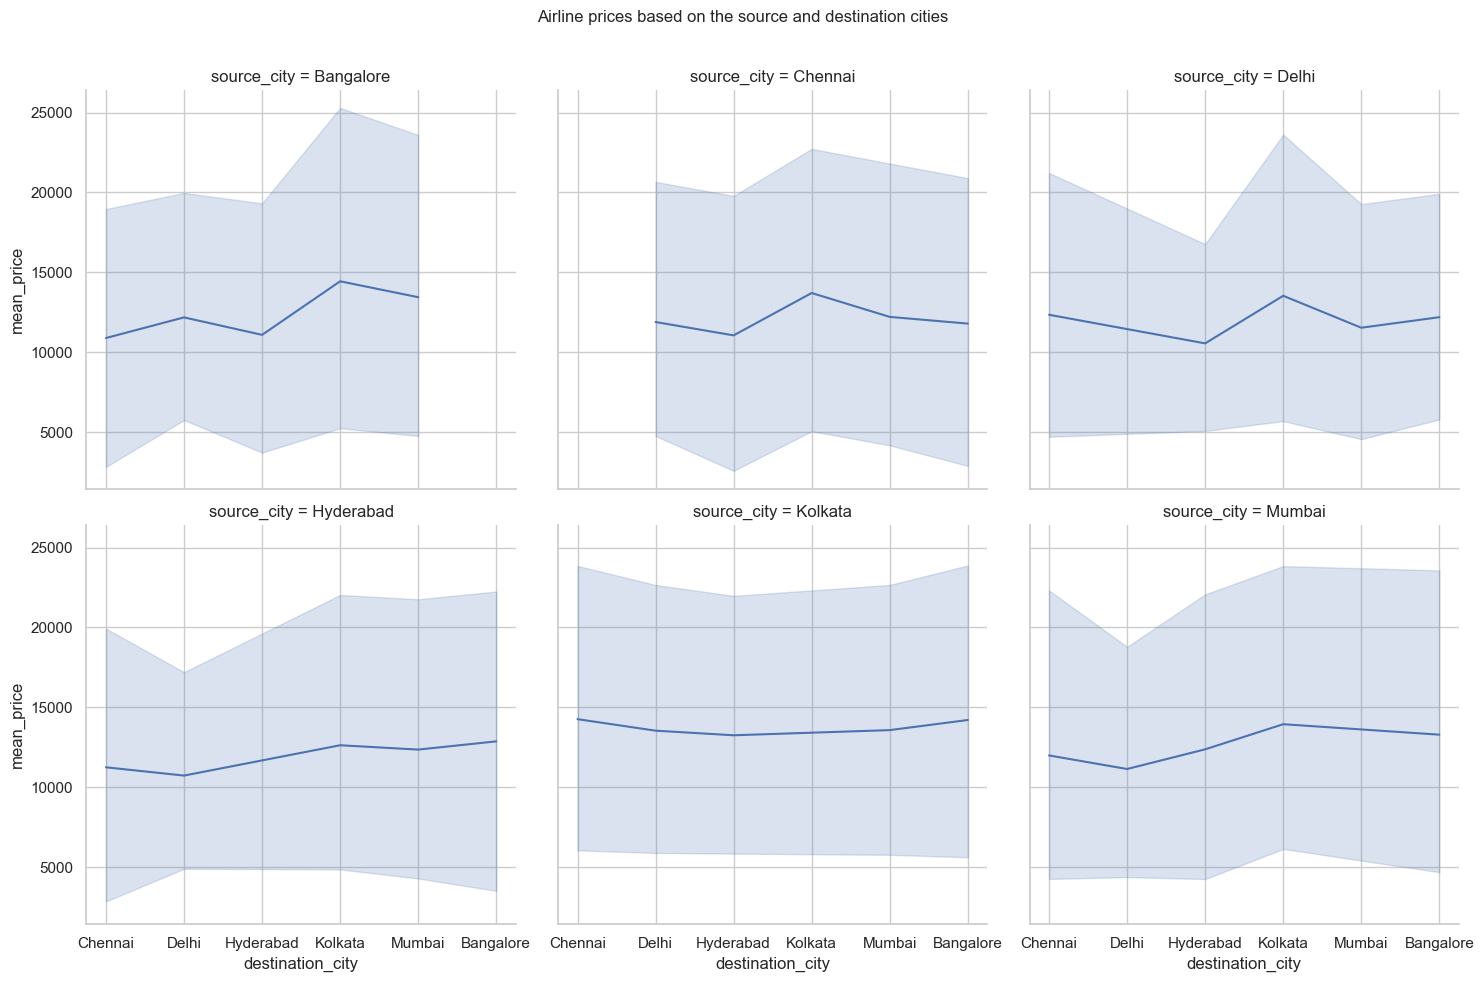

In [98]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

df_grouped = df.groupby(['airline', 'source_city', 'destination_city'], as_index=False)['price'].mean().head(300153)

flightdf = pd.DataFrame({
    'airline': df_grouped['airline'],
    'source_city': df_grouped['source_city'],
    'destination_city': df_grouped['destination_city'],
    'mean_price': df_grouped['price']
})

ax = sns.relplot(col="source_city", y="mean_price", kind="line", x='destination_city', data=flightdf, col_wrap=3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline prices based on the source and destination cities', fontsize=12)

plt.show()


Outcome: The average price of airline tickets in India varies significantly depending on the source city, destination city, and airline. The highest average prices are for flights from Bangalore to Chennai and Mumbai, and for flights on IndiGo airlines. This is likely due to factors such as demand, competition, and operating costs.

#### Airline prices based on the number of stops for Economy

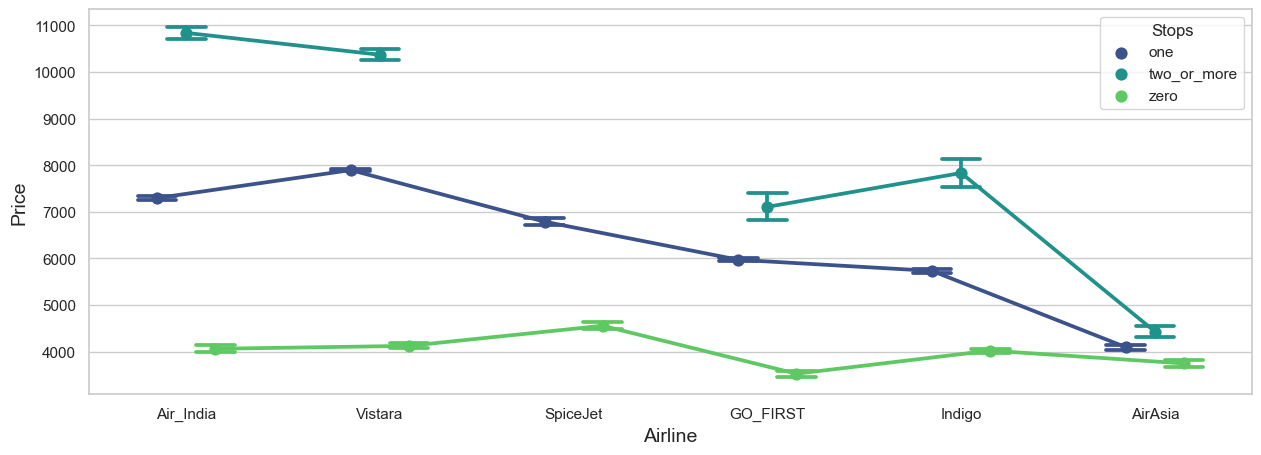

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("viridis", n_colors=df["stops"].nunique())

fig, ax = plt.subplots(figsize=(15, 5))

economy_data = df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False)

sns.pointplot(x="airline", y="price", hue="stops", data=economy_data, palette=colors, ax=ax, dodge=0.3, capsize=0.2)
ax.set_title("", fontsize=0)
ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.legend(title="Stops")

plt.show()


#### Anderson-Darling Test

In [90]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

seed(1) 

# Perform the Anderson-Darling test on the 'price' column of the 'flightdf' DataFrame.
result = anderson(df['price'])

# Extract the test statistic and critical values from the result.
statistic = result.statistic
critical_values = result.critical_values

print('Statistic: %.3f' % statistic)

# Compare the test statistic with critical values to determine normality.
for i, cv in enumerate(critical_values):
    if statistic < cv:
        print('The data follows a normal distribution (fail to reject the null hypothesis) at %.1f%% level of significance.' % ((i+1)*10))
    else:
        print('The data does not follow a normal distribution (reject the null hypothesis) at %.1f%% level of significance.' % ((i+1)*10))


Statistic: 34186.033
The data does not follow a normal distribution (reject the null hypothesis) at 10.0% level of significance.
The data does not follow a normal distribution (reject the null hypothesis) at 20.0% level of significance.
The data does not follow a normal distribution (reject the null hypothesis) at 30.0% level of significance.
The data does not follow a normal distribution (reject the null hypothesis) at 40.0% level of significance.
The data does not follow a normal distribution (reject the null hypothesis) at 50.0% level of significance.


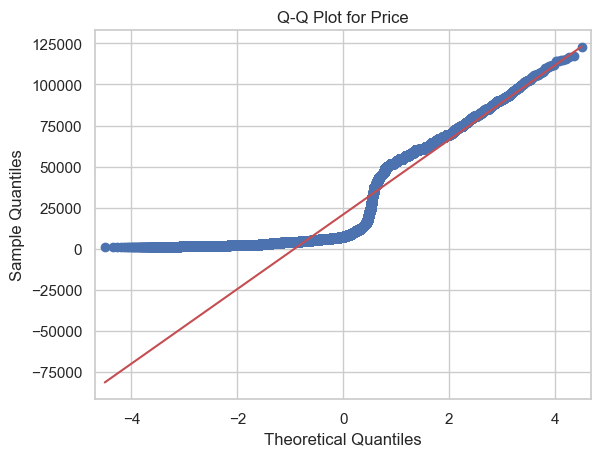

In [112]:
sm.qqplot(df['price'], line='s')
plt.title('Q-Q Plot for Price')
plt.show()


Outcome: The Anderson-Darling Test is known for its increased sensitivity to deviations from normality in the tails of the distribution compared to other tests such as the Shapiro-Wilk test. Additionally, it provides critical values for various significance levels, enabling an assessment of the extent of departure from normality. 

Since the data does not follow a normal distribution, we can reject the null hypothesis.

In [117]:
df.to_excel("/Users/filipecorreia/Desktop/ML_1/Clean_Dataset1.xlsx")